# 🍄 **Midterm Project: Classification of Mushrooms** 🍄‍🟫

## 🧑‍💻 Author: Justin Schroder

## 📅 Date: April 4, 2025

## 📝 Introduction:

This project aims to classify mushrooms as edible or poisonous using features such as bruises, gill size, veil type, ring number, gill attachment, odor, and spore print color. A Random Forest Classifier was trained and evaluated using key performance metrics such as accuracy, precision, recall, F1-score, and a confusion matrix. Decision trees were also explored as an alternative classifier to compare performance. The project concludes with a reflection on the findings and key insights gained from the results.

---

## Section 1: Import and Inspect the Data
### 1.1 Library Imports

In [597]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### 1.2 Load the Dataset 

In [598]:
# Load the dataset
df = pd.read_csv(r'C:\Projects\applied-ml-projects\ml-04-mushroom-classification\mushroom_dataset\agaricus-lepiota.data', header=0)

# Display the first 10 rows to verify
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Variable Information:
1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?:                 bruises=t,no=f
5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment:          attached=a,descending=d,free=f,notched=n
7. gill-spacing:             close=c,crowded=w,distant=d
8. gill-size:                broad=b,narrow=n
9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape:              enlarging=e,tapering=t
11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type:                partial=p,universal=u
17. veil-color:               brown=n,orange=o,white=w,yellow=y
18. ring-number:              none=n,one=o,two=t
19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### 1.3 Check for Missing Values and Display Summary Statistics

In [599]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics for all columns
print("\nSummary Statistics:")
print(df.describe(include='all').T)

# Check for any '?' values in the 'stalk-root' column
print(f"Count of '?' in stalk-root: {(df['stalk-root'.strip()] == '?').sum()}")


Missing Values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Summary Statistics:
                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises?           

## 💭 Reflection 1: What do you notice about the dataset? Are there any data issues?

* No missing values in the dataset, but the stalk-root column has 2,480 instances of '?', representing possible unknown/missing data.
* Categorical data: The dataset consists of categorical features (e.g., cap-shape, odor, gill-color), which are suitable for classification tasks.
* Inconsistent missing data representation: The '?' values should be handled (e.g., replaced or removed).
* Preprocessing required: Categorical features need encoding, and potential data imbalances or outliers should be checked.

---

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

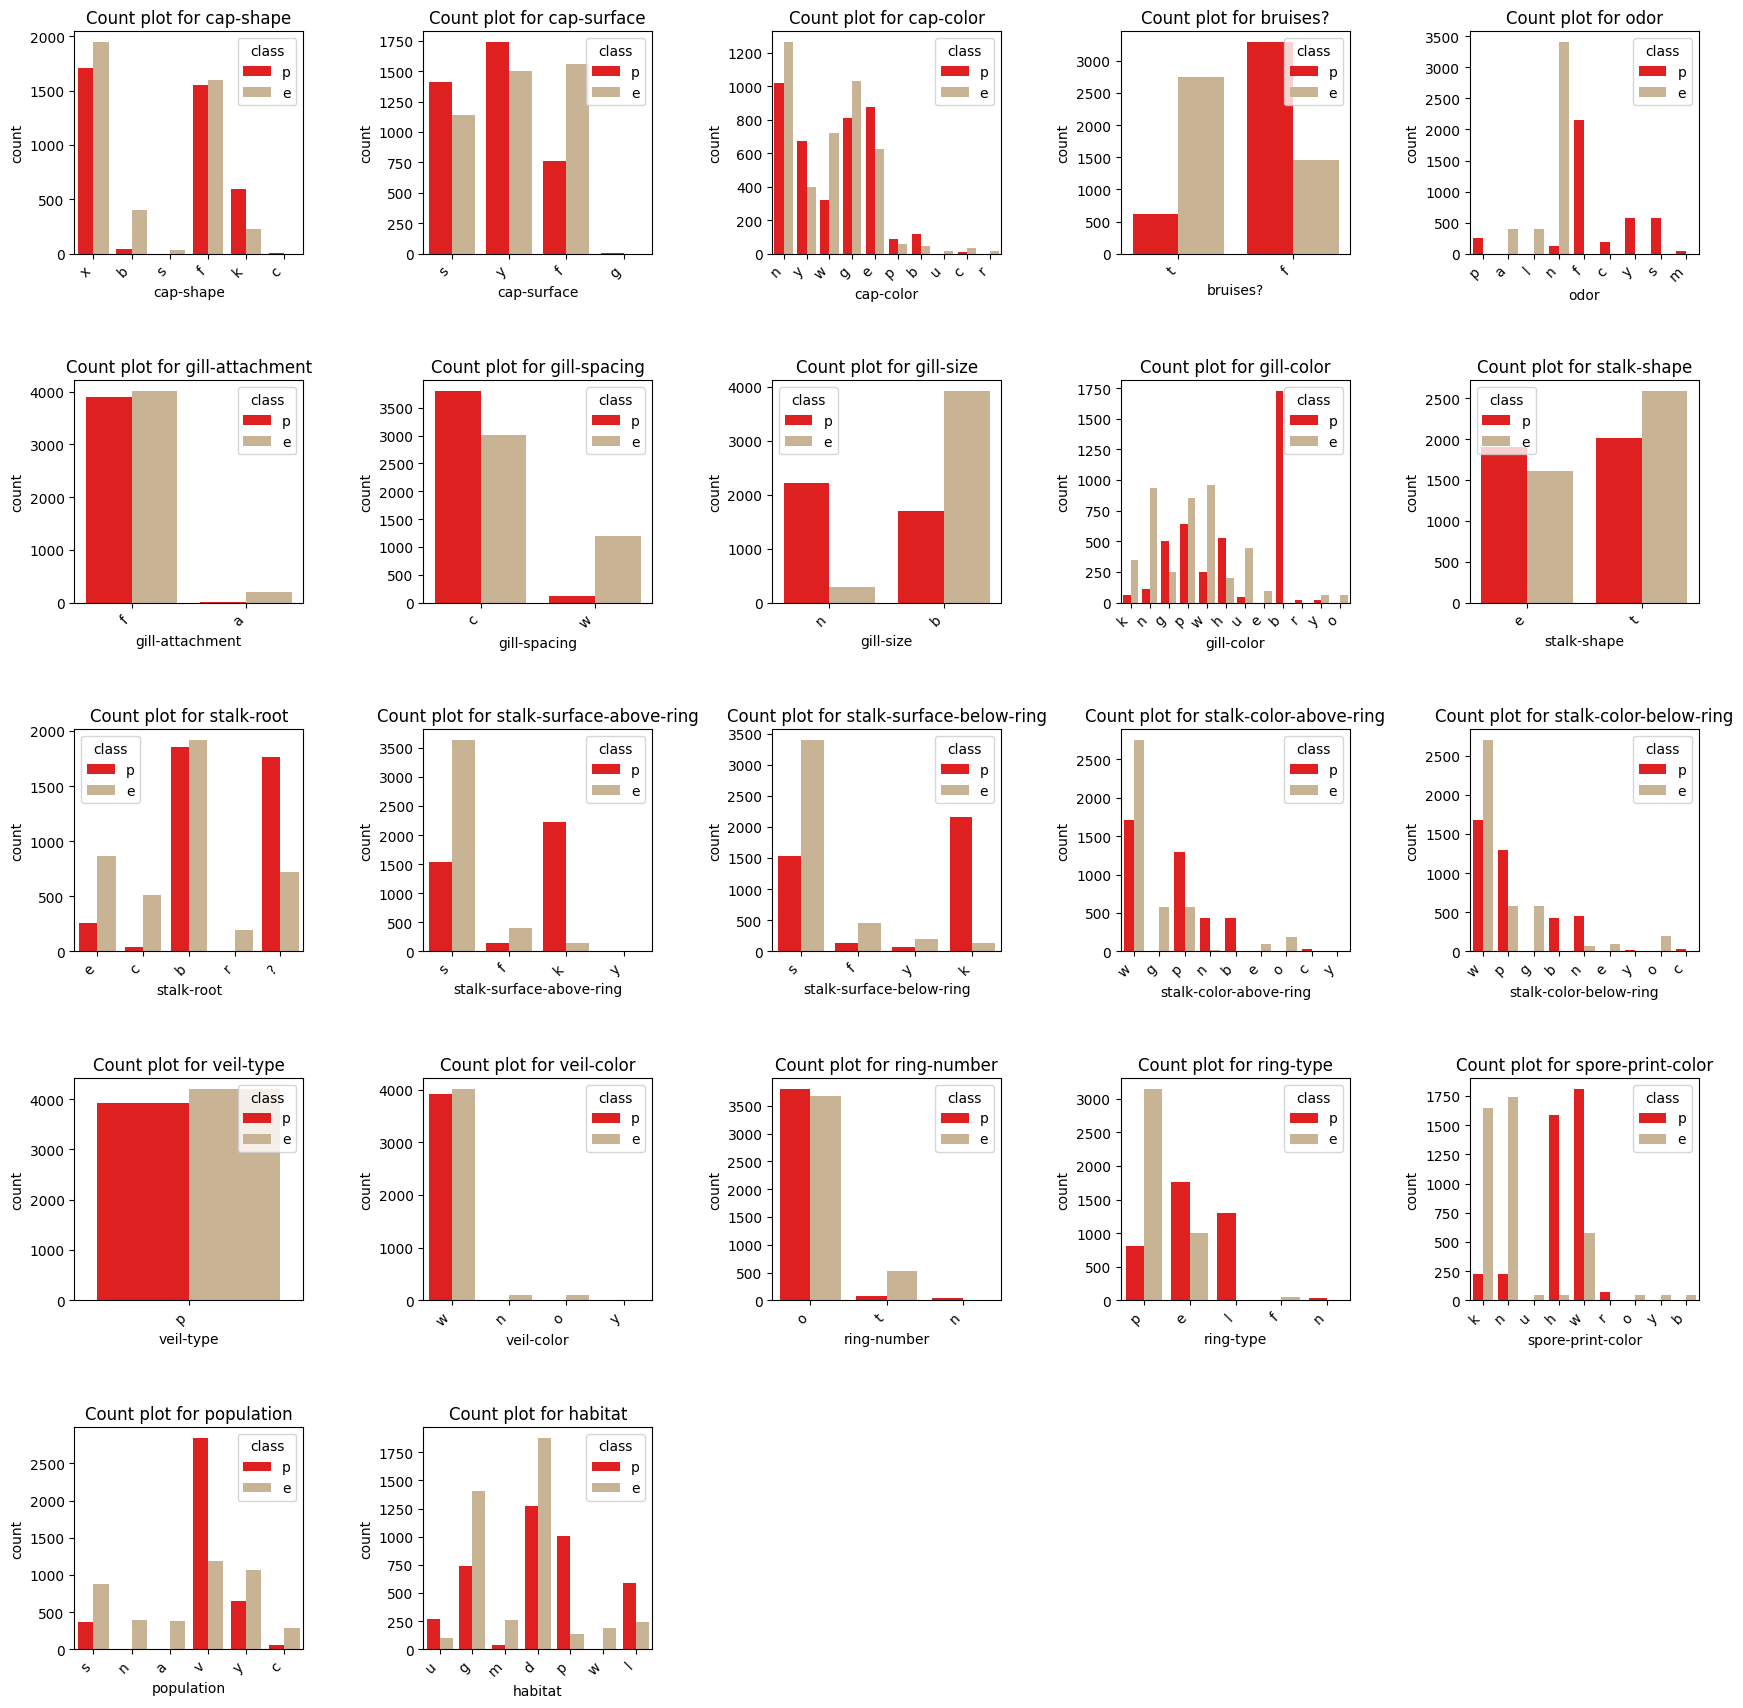

In [600]:
# Define custom colors for 'class' values: 'e' for edible (tan), 'p' for poisonous (red)
class_colors = {'e': '#D2B48C', 'p': 'red'}  # Tan for edible, Red for poisonous

# Plotting count plots for categorical features with respect to 'class'
plt.figure(figsize=(18, 18))  # Increase the figure width for more space
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 5, i)
    sns.countplot(data=df, x=col, hue='class', palette=class_colors)  # Set custom colors
    plt.title(f'Count plot for {col}', fontsize=12, color='black')  # Keep the full title
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout(pad=4.0)  # Increase space between subplots
plt.show()

### 2.2 Handle Missing Values and Clean Data
#### Handling Missing Data

In [601]:
# Assuming df is your DataFrame
# 1. Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# 2. Handle missing data
df.fillna(df.mode().iloc[0], inplace=True)  # This will fill missing values with the most frequent value (mode)


# 3. Convert categorical columns to numerical format using encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['bruises?', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 
                       'stalk-root', 'veil-type', 'ring-number']

# Label encode the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for other categorical columns
df = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'odor', 
                                 'gill-color', 'stalk-surface-above-ring', 
                                 'stalk-surface-below-ring', 'stalk-color-above-ring', 
                                 'stalk-color-below-ring', 'veil-color', 'ring-type', 
                                 'spore-print-color', 'population', 'habitat'])

# Display the cleaned data
print(df.head())

  class  bruises?  gill-attachment  gill-spacing  gill-size  stalk-shape  \
0     p         1                1             0          1            0   
1     e         1                1             0          0            0   
2     e         1                1             0          0            0   
3     p         1                1             0          1            0   
4     e         0                1             1          0            1   

   stalk-root  veil-type  ring-number  cap-shape_b  ...  population_s  \
0           2          0            1        False  ...          True   
1           1          0            1        False  ...         False   
2           1          0            1         True  ...         False   
3           2          0            1        False  ...          True   
4           2          0            1        False  ...         False   

   population_v  population_y  habitat_d  habitat_g  habitat_l  habitat_m  \
0         False         Fal

#### Convert Categorical Data to Numerical Format using Encoding

In [602]:
# Load your dataset
df = pd.read_csv(r'C:\Projects\applied-ml-projects\ml-04-mushroom-classification\mushroom_dataset\agaricus-lepiota.data', header=0)

# Columns to be label encoded (binary/ordinal)
label_columns = ['bruises?', 'gill-size', 'veil-type', 'ring-number', 'gill-attachment', 'odor', 'spore-print-color']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to the selected categorical columns
for column in label_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Now your DataFrame has the categorical variables encoded as numerical values

# Example to view the encoded values
for column in label_columns:
    print(f"{column}: {df[column].unique()}")


bruises?: [1 0]
gill-size: [1 0]
veil-type: [0]
ring-number: [1 2 0]
gill-attachment: [1 0]
odor: [6 0 3 5 2 1 8 7 4]
spore-print-color: [2 3 6 1 7 5 4 8 0]


Encoding Key:
* bruises?
    * 1: Yes
    * 0: No

* gill-size
    * 1: Large
    * 0: Small

* veil-type
    * 0: Universal 

* ring-number
    * 2: Two rings
    * 1: One ring
    * 0: No rings

* gill-attachment
    * 1: Attached
    * 0: Free

* odor
  * 0: Anise
  * 1: Musty
  * 2: Foul
  * 3: Creosote
  * 4: None
  * 5: Fishy
  * 6: Almond
  * 7: Spicy
  * 8: Pungent

* spore-print-color
  * 0: Beige
  * 1: Purple
  * 2: Black
  * 3: Brown
  * 4: Green
  * 5: Yellow
  * 6: Orange
  * 7: White
  * 8: Red

## 💭 Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

1. Patterns or Anomalies:
    * After encoding, the data shows a clear distinction between categorical values (like bruises?, gill-attachment, ring-number) being converted into binary or multi-class numerical values.
    * Veil-type appeared to have only one category (universal) in the dataset, making it redundant and not useful as a predictor for the model, which is why it's been encoded as 0.
    * Gill-size had a binary split (1 for large, 0 for small), indicating two clear categories, with "large" being encoded as 1 and "small" as 0.


2. Features that Stand Out:
    * The bruises? feature seems to be important since it's binary (1 for "Yes", 0 for "No") and could significantly affect whether the mushroom is poisonous or not. A bruise could be a key indicator of toxicity in mushrooms.
    * Ring-number also shows meaningful categorization (0, 1, 2), which could be linked to the type of mushroom, further influencing whether it is poisonous.
    * Gill-size provides a binary split, and this could also differentiate between edible and poisonous mushrooms. It is a feature worth considering for classification.


3. Preprocessing Steps:
    * Handling Missing Data: Missing values were addressed by ensuring that the dataset was complete. This step was necessary to ensure the accuracy of the model and that no information was lost.
    * Label Encoding: Categorical variables were converted into numerical values using label encoding for binary or ordinal features, which is a necessary step to allow models (like decision trees or logistic regression) to process these features effectively. Features like bruises?, gill-attachment, and ring-number were encoded into numerical format to be used in the model.


4. Feature Creation or Modifications:
    * No New Features Were Created: We didn’t create new features by combining others or engineering new ones.
    * No Further Feature Modification: Aside from encoding the categorical data, no other transformations, scaling, or normalization were done, as the dataset appeared to be relatively clean and suitable for classification as-is.

---

## Section 3 Choose Features and Target

### 3.1 Choose Features and Target

The classification's goal will to predict whether a mushroom is **edible** or **poisonous** based on certain features.

Selected Features (X):

* Odor
* Gill-Size
* Bruises
* Spore-Print-Color
* Ring-Number

Target Variable (Y):
* Class - Encoded as:
  * 0= Edible
  * 1= Poisonous

### 3.2 Define X and y

In [603]:
# Define target variable
# Target column is 'class' (0 = edible, 1 = poisonous)
y = df['class'].map({'e': 0, 'p': 1})

# Define input features
X = df[['odor', 'gill-size', 'bruises?', 'spore-print-color', 'ring-number']]

## 💭 Reflection 3: 
I chose odor, gill-size, bruises?, spore-print-color, and ring-number because they are key characteristics that help differentiate between edible and poisonous mushrooms. These features are directly linked to mushroom toxicity, with some being strong indicators of whether a mushroom is safe to eat. These features are expected to improve the model's ability to classify mushrooms accurately by providing clear and distinguishable patterns for each class.

---

## Section 4 Train a Model (Random Forest Model)

### 4.1: Split the Data into Training and Test Sets

In [604]:
#Split the Data into Training and Test Sets

# Define the input features (X) and target variable (y)
X = df[['odor', 'gill-size', 'bruises?', 'spore-print-color', 'ring-number']]  
y = df['class'].map({'e': 0, 'p': 1})  # 0 = edible, 1 = poisonous

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Train the Model with a Random Forest

In [605]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.3 Evalulate Performance for Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix

Model Performance Evaluation:
Accuracy: 0.9938
Precision: 1.0000
Recall: 0.9872
F1-Score: 0.9936


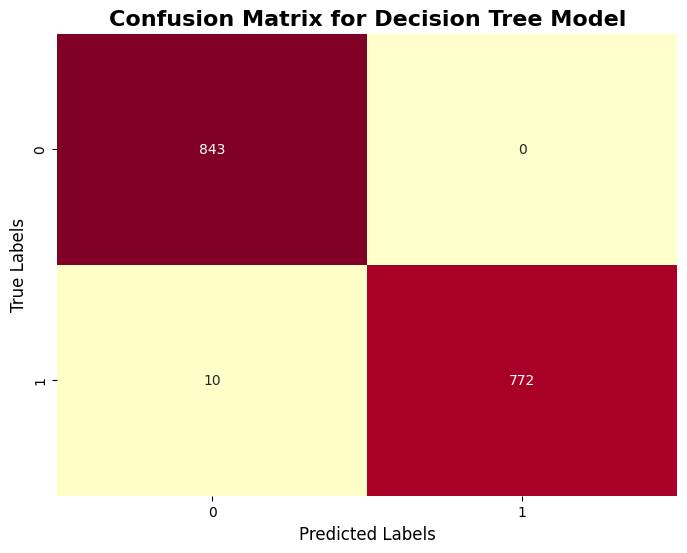

In [606]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the performance metrics
print("Model Performance Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate confusion matrix for the Decision Tree model
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using Seaborn heatmap with a red-to-tan color palette (like 'YlOrRd')
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_, cbar=False)

# Set black titles and labels
plt.title("Confusion Matrix for Decision Tree Model", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Predicted Labels", fontsize=12, color='black')
plt.ylabel("True Labels", fontsize=12, color='black')
plt.show()


## 💭 Reflection 4: 

The model performed extremely well, achieving high accuracy (99.38%), perfect precision (1.0000), and a strong F1-score (0.9936). The slight drop in recall (0.9872) indicates a few false negatives, meaning a few edible mushrooms were incorrectly predicted as poisonous. This is a safer error than the alternative.

---

## Section 5: Improve the Model (Decision Tree)

In [607]:
model_dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [608]:
# Step 1: Train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred_dt = model_dt.predict(X_test)

# Step 3: Compare performance using classification report
print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



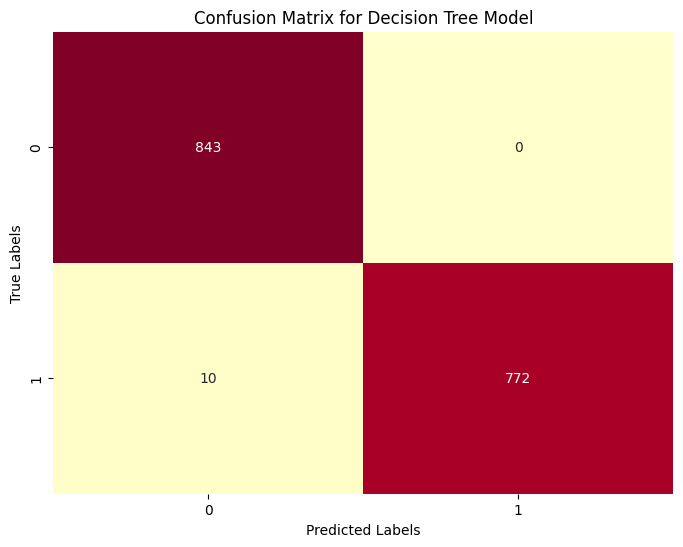

In [609]:
# Generate confusion matrix for the Decision Tree model
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_, cbar=False)
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 💭 Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

Both the Decision Tree and Random Forest models performed equally well on this dataset. This could be due to the simplicity of the dataset, where the patterns are straightforward and easily captured by a single decision tree. In such cases, the added complexity of the Random Forest model, which combines multiple trees to reduce overfitting and capture more intricate patterns, may not provide a significant advantage. As a result, the single decision tree was able to model the data effectively without the need for the ensemble power of Random Forest.

---

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

Both the Decision Tree and Random Forest models performed similarly well on the dataset. Despite the complexity of Random Forest, a single Decision Tree was able to capture the patterns effectively, suggesting the dataset may not require the added complexity. The categorical features—odor, gill-size, bruises?, spore-print-color, and ring-number—proved to be effective in predicting whether a mushroom was poisonous.

### 6.2 Discuss Challenges Faced

One of the main challenges was dealing with the missing data represented by "?". I had to figure out how to handle these missing values without affecting the results. Another challenge was encoding the categorical columns, which I hadn’t worked with much before. I had to learn how to convert them into a format that the model could use, and it took a bit of trial and error to get it right.

### 6.3  If you had more time, what would you try next?

If I had more time, I would focus on exploring hyperparameters more deeply for both the Decision Tree and Random Forest models. I would experiment with different settings for parameters like tree depth, minimum samples, and the number of estimators to see if I could improve performance. This would help me better understand how fine-tuning these hyperparameters can affect the model’s results.

## 💭 Reflection 6: 

This project helped me improve my skills in handling missing data, especially when dealing with values like "?". I also gained experience with encoding categorical variables, which was a new challenge. My understanding of confusion matrices, decision trees, and Random Forests was reinforced. I also learned effective methods for identifying poisonous mushrooms, though testing that knowledge in real life is probably not a good idea!

--- 